In [1]:
import os
import numpy as np
%matplotlib inline

import metrics
import util

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 21242.9] [loc=0.997 scale=0.002]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 21242.9] [loc=0.997 scale=0.002]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:0.996646, scale:0.002280)
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 15.715] [loc=0.405 scale=0.032]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 15.715] [loc=0.405 scale=0.032]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:0.404962, scale:0.032125)
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 427.373] [loc=0.9

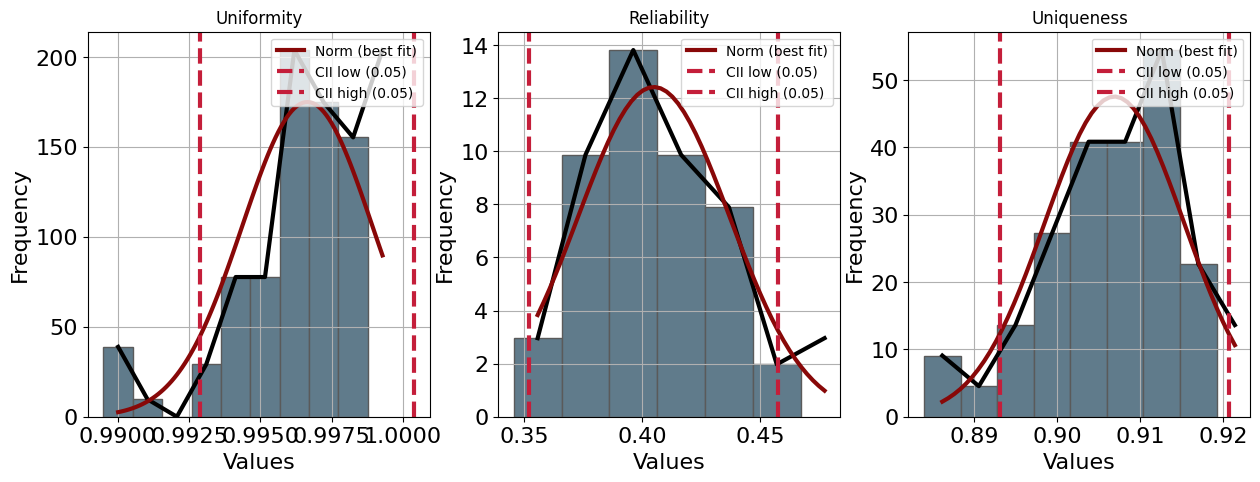

In [11]:
NUMBER_OF_RESPONSES    = 100
PD_COUNT               = 100

PD_CENTER              = 750
PD_SIGMA               = 150

PD_DEVIATION_SIGMA     = 0.01

PD_INTERCONNECT_CENTER = PD_CENTER * 5
PD_INTERCONNECT_SIGMA  = PD_SIGMA


interconnect_pd = [ np.random.normal(PD_INTERCONNECT_CENTER, PD_INTERCONNECT_SIGMA, PD_COUNT) for _ in range(50) ] 
pds = [ np.random.normal(PD_CENTER, PD_SIGMA, PD_COUNT) for _ in range(50) ]

res = metrics.calc_metrics(pds, interconnect_pd, NUMBER_OF_RESPONSES, PD_DEVIATION_SIGMA)
metrics.plot_metrics(res)

32785.0


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 5066.64] [loc=0.996 scale=0.002]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 5066.64] [loc=0.996 scale=0.002]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:0.996293, scale:0.002470)
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.74 sec] [RSS: nan] [loc=0.000 scale=0.000]
[distfit] >INFO> [norm] [0.74 sec] [RSS: nan] [loc=0.000 scale=0.000]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:0.000000, scale:0.000000)
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 7692] [loc=0.538 scale=

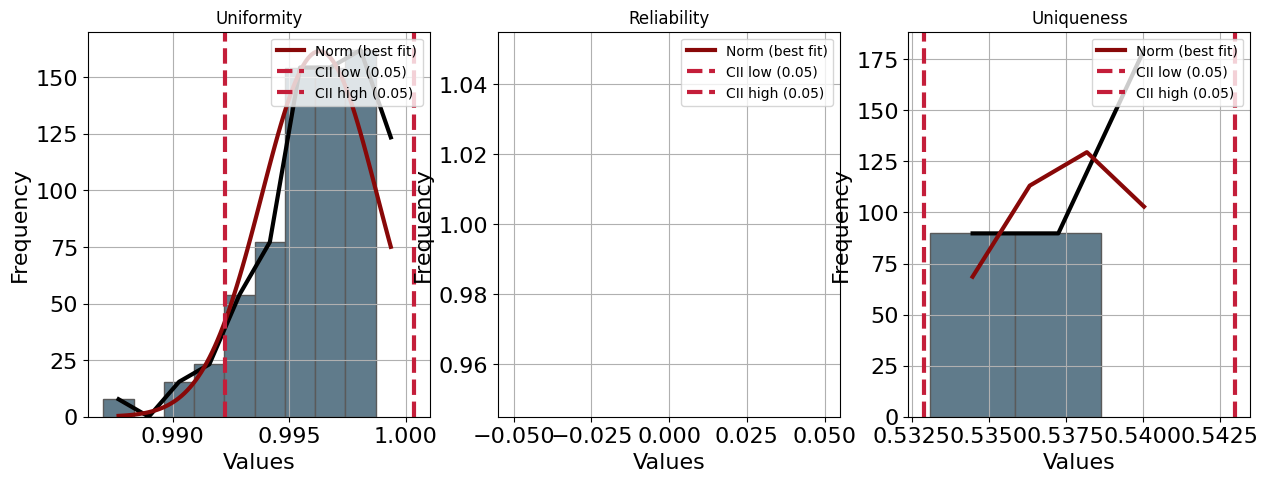

In [9]:
PD_DEVIATION_SIGMA = 0.005
NUMBER_OF_RESPONSES = 100


path = 'DataSet_01/F0/' 
pds = [ util.read_pd_from_file_limited(f"{path}/{file}") for file in os.listdir(path) ] 

PD_INTERCONNECT_CENTER = pds[0][0]
print(PD_INTERCONNECT_CENTER)
PD_INTERCONNECT_SIGMA  = 0.0005

interconnect_pd = [ np.random.normal(PD_INTERCONNECT_CENTER, PD_INTERCONNECT_SIGMA, len(pd)) for pd in pds ] 

res = metrics.calc_metrics(pds, interconnect_pd, NUMBER_OF_RESPONSES, PD_DEVIATION_SIGMA)
metrics.plot_metrics(res)


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 73302.2] [loc=0.999 scale=0.001]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 73302.2] [loc=0.999 scale=0.001]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:0.998565, scale:0.001024)
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 685.287] [loc=0.275 scale=0.011]
[distfit] >INFO> [norm] [0.00 sec] [RSS: 685.287] [loc=0.275 scale=0.011]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:0.274812, scale:0.010581)
[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 16377.9] [loc=0

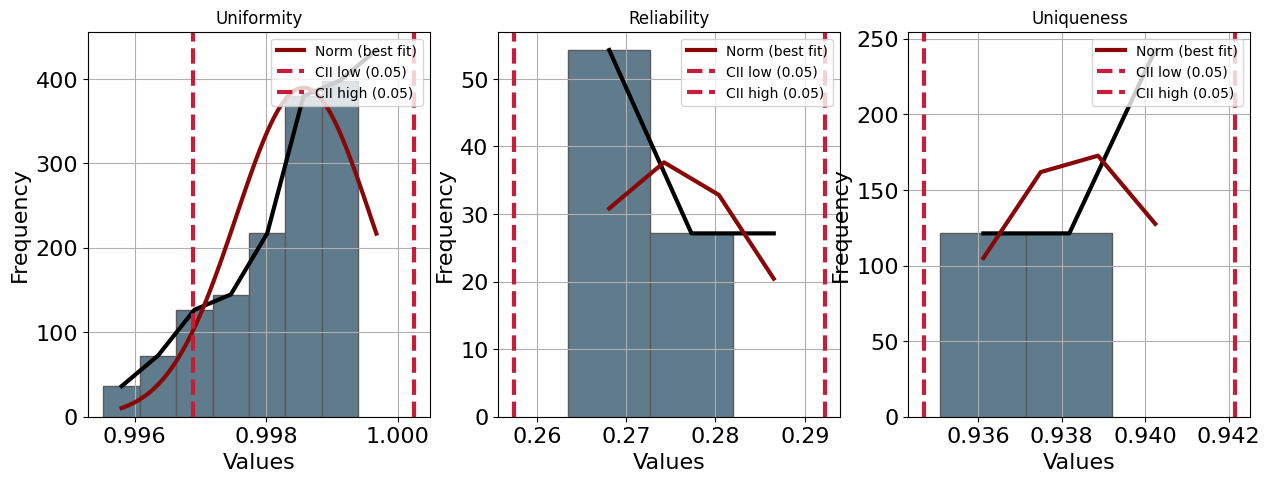

In [12]:
PD_DEVIATION_SIGMA  = 0.0005
NUMBER_OF_RESPONSES = 100


paths = ['DataSet_01/F0/CRO_REAL_FIXED_F0_C0.txt',
        'DataSet_01/F1/CRO_REAL_FIXED_F1_C0.txt',
        'DataSet_01/F2/CRO_REAL_FIXED_F2_C0.txt',
        'DataSet_01/F3/CRO_REAL_FIXED_F3_C0.txt']

pds = [ util.read_pd_from_file_limited(path) for path in paths ]

PD_INTERCONNECT_CENTER = 0
PD_INTERCONNECT_SIGMA  = 0

interconnect_pd = [ np.random.normal(PD_INTERCONNECT_CENTER, PD_INTERCONNECT_SIGMA, len(pd)) for pd in pds ] 



res = metrics.calc_metrics(pds, interconnect_pd, NUMBER_OF_RESPONSES, PD_DEVIATION_SIGMA)
metrics.plot_metrics(res)

In [8]:
from scipy.spatial import distance


def cmp_pd(a: np.float32, b: np.float32, diviation: float) -> int:
    div = 1 + np.random.normal(0, diviation, size=2)
    return (a + div[0] > b * div[1]).astype(int)

def read_dataset_pairs_responses(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        pairs = dict()

        for l in lines:
            v = l.split(' ')
            pairs[(int(v[0]), int(v[1]))] = (int(v[2]), int(v[3]), int(v[4]), int(v[5]))

        return pairs

def read_pds(paths: list) -> list:
    return [util.read_pd_from_file(path) for path in paths]


def calculate(golden_val: dict, div: float):
    calc = dict()
    for key, _ in golden_val.items():
        res = [0, 0, 0, 0]
        
        for _ in range(100):
            res[0] += int(cmp_pd(pds[0][key[0]], pds[0][key[1]], div))
            res[1] += int(cmp_pd(pds[1][key[0]], pds[1][key[1]], div))
            res[2] += int(cmp_pd(pds[2][key[0]], pds[2][key[1]], div))
            res[3] += int(cmp_pd(pds[3][key[0]], pds[3][key[1]], div))

        calc[(key[0], key[1])] = tuple(res)
    return calc

golden_val = read_dataset_pairs_responses('DataSet_02/F0/CRO_REAL_FIXED_F0_10k.txt')
pds = read_pds([
    'DataSet_01/F0/CRO_REAL_FIXED_F0_C0.txt',
    'DataSet_01/F0/CRO_REAL_FIXED_F0_C1.txt',
    'DataSet_01/F0/CRO_REAL_FIXED_F0_C2.txt',
    'DataSet_01/F0/CRO_REAL_FIXED_F0_C3.txt'
])
calc = calculate(golden_val, 0.05)
res = [val == calc[key] for key, val in golden_val.items()]
print(np.unique(res, return_counts=True))

vals = list(calc.values())
vec = ()
for i in vals:
    vec += i

dist = 0
i = 0
s = 0

while s < 0.3:
    a = calculate(golden_val, s)
    state = ()
    for i in list(a.values()):
        state += i
    d = distance.hamming(state, vec)
    dist = min(d, dist)

    s += 0.01

print(s)
print(dist)

(array([False]), array([9931]))


KeyboardInterrupt: 